In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAND = 42

In [2]:
X_scaled = pd.read_csv("../datasets/penguins/simple/X_scaled.csv", index_col=0, header=0)
X_scaled_idx = X_scaled.index
X_scaled = X_scaled.to_numpy()
y = pd.read_csv("../datasets/penguins/simple/y.csv", index_col=0, header=0)

In [3]:
from minisom import MiniSom
import pickle

som: MiniSom = None

with open("models/som_optimized_model.p", 'rb') as infile:
	som = pickle.load(infile)

In [4]:
node_weights = som.get_weights()
node_weights_flat = node_weights.reshape(-1, node_weights.shape[2])

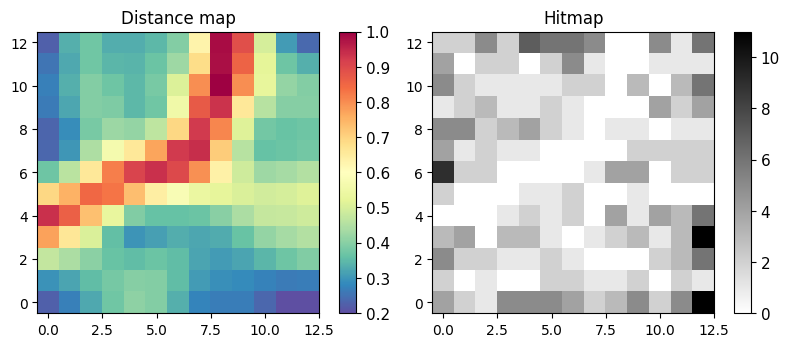

In [5]:
from _utilities.som_plot import visualize_distance_map, visualize_hitmap

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

visualize_distance_map(som=som, X=X_scaled, ax=ax0)
visualize_hitmap(som=som, X=X_scaled, ax=ax1)

plt.tight_layout()         
plt.show()

In [6]:
from lilypond.basin import Basin

basin = Basin(som, X_scaled, random_seed=RAND).prepare()

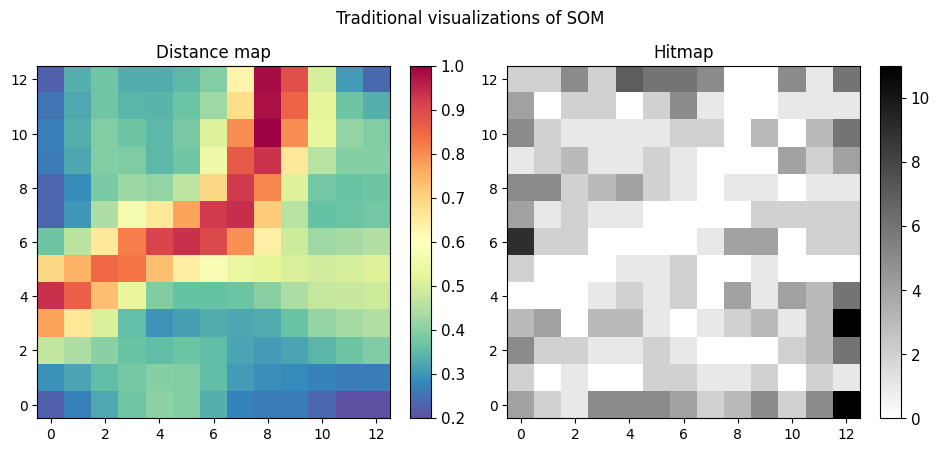

In [7]:
basin.legacy_pond() \
    .visualize(figsize=(9.5, 4.5))

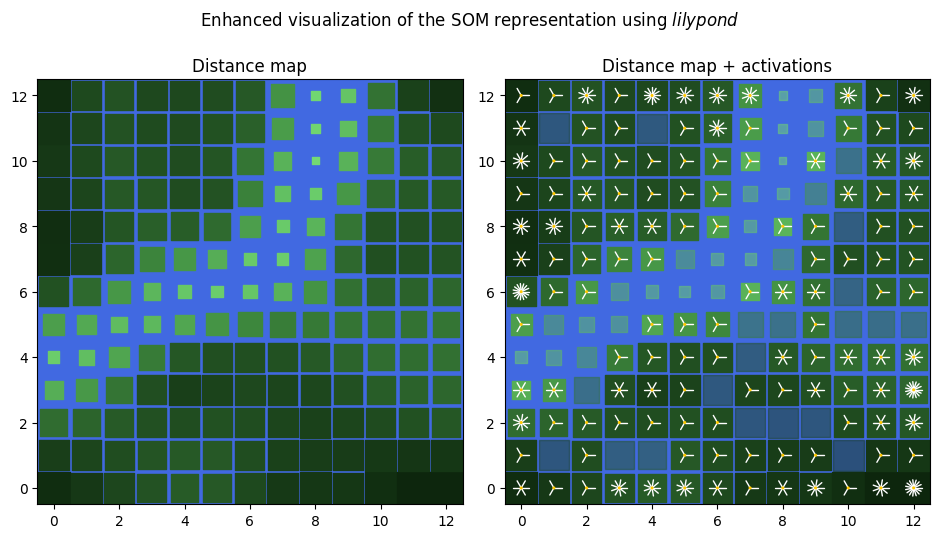

In [11]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9.5, 5.5))

basin.pond() \
    .set_coloring_strategy(strategy="distance_map") \
	.discretize_petals(n_bins=5) \
    .flood(below_activations=0) \
	.style_pad(marker="s", gap=0) \
	.style_petal(hide=True) \
    .style_flood(underwater_opacity=.25) \
	.observe(return_fig=True, ax=ax0, title="Distance map")

basin.pond() \
    .set_coloring_strategy(strategy="distance_map") \
	.discretize_petals(n_bins=5) \
    .flood(below_activations=1) \
	.style_pad(marker="s", gap=0) \
	.style_petal(magnifier=3) \
    .style_flood(underwater_opacity=.5) \
	.observe(return_fig=True, ax=ax1, title="Distance map + activations")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

plt.suptitle("Enhanced visualization of the SOM representation using $lilypond$")
plt.tight_layout()
plt.show()

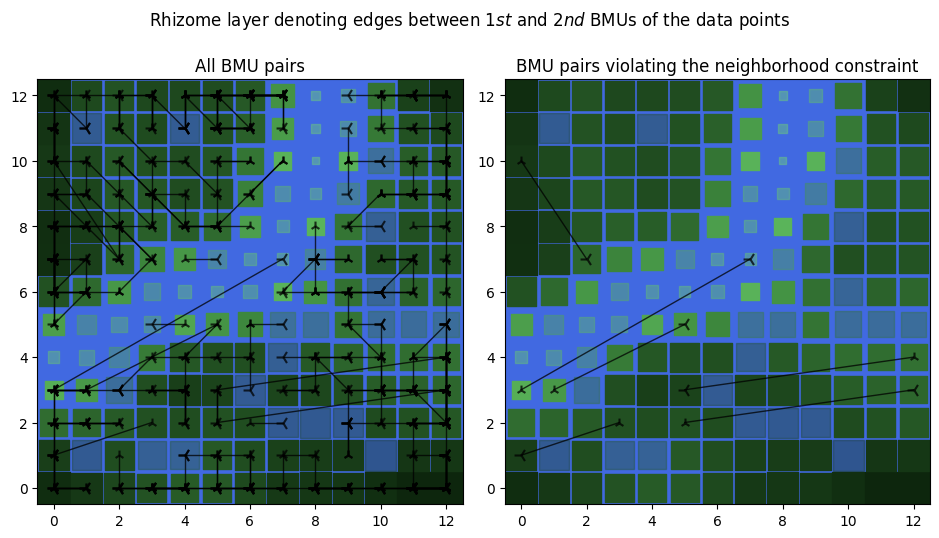

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9.5, 5.5))

basin.pond() \
    .set_coloring_strategy(strategy="distance_map") \
    .flood(below_activations=1) \
	.style_pad(marker="s", gap=0) \
	.style_petal(hide=True) \
	.style_flood(underwater_opacity=.4) \
	.style_rhizome(zorder=11, marker_start="2", marker_end="3", opacity=.75) \
	.see_rhizome(mode="all", ax=ax0) \
	.observe(return_fig=True, ax=ax0, title="All BMU pairs")

basin.pond() \
    .set_coloring_strategy(strategy="distance_map") \
    .flood(below_activations=1) \
	.style_pad(marker="s", gap=0) \
	.style_petal(hide=True) \
	.style_flood(underwater_opacity=.4) \
	.style_rhizome(zorder=11, marker_start="2", marker_end="3", opacity=.75) \
	.see_rhizome(mode="violating", ax=ax1) \
	.observe(return_fig=True, ax=ax1, title="BMU pairs violating the neighborhood constraint")

for ax in (ax0, ax1):
    ax.set_aspect('equal')

plt.suptitle("Rhizome layer denoting edges between $1st$ and $2nd$ BMUs of the data points")
plt.tight_layout()
plt.show()